In [105]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [106]:
df = pd.read_csv('dataset\Social_Network_Ads.csv')

In [107]:
df = df.iloc[:,2: ]

In [108]:
df.sample(5)

,Age,EstimatedSalary,Purchased
12,20,86000,0
165,18,86000,0
128,30,17000,0
336,58,144000,1
306,51,134000,0


In [109]:
df.shape

(400, 3)

## Train Test Split

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((280, 2), (120, 2), (280,), (120,))

## Standard Scalar

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train) # ------> yeh mean aur std ko calculate karega
x_train_scaled = sc.transform(x_train) # ------> yeh x_train ko scale karega
x_test_scaled = sc.transform(x_test) # ------> yeh x_test ko scale karega

In [85]:
sc.mean_

array([3.78642857e+01, 6.98071429e+04])

In [86]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [87]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [88]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Effect Scaling

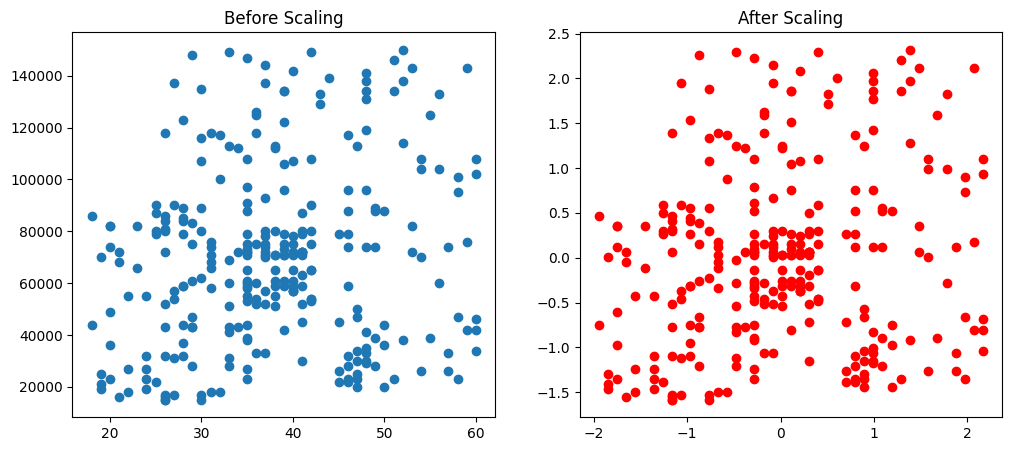

In [89]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

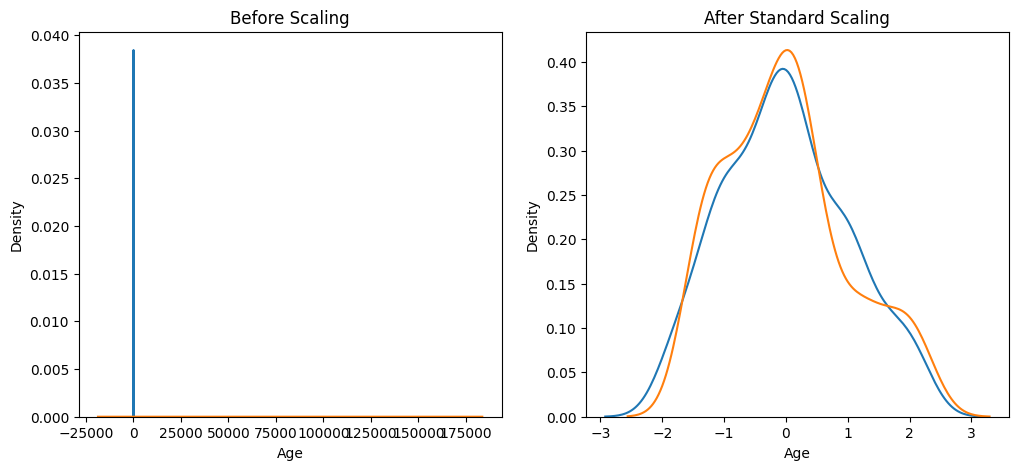

In [90]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

Comparison of Distributions

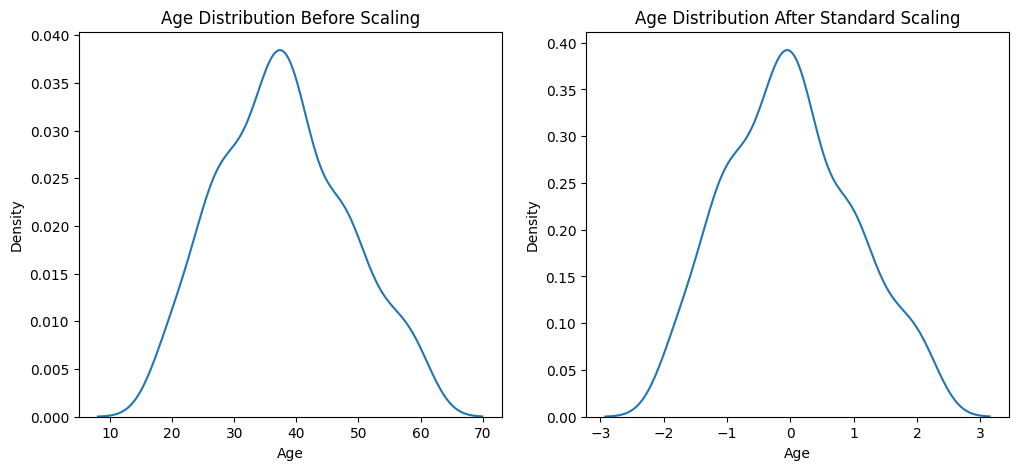

In [91]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

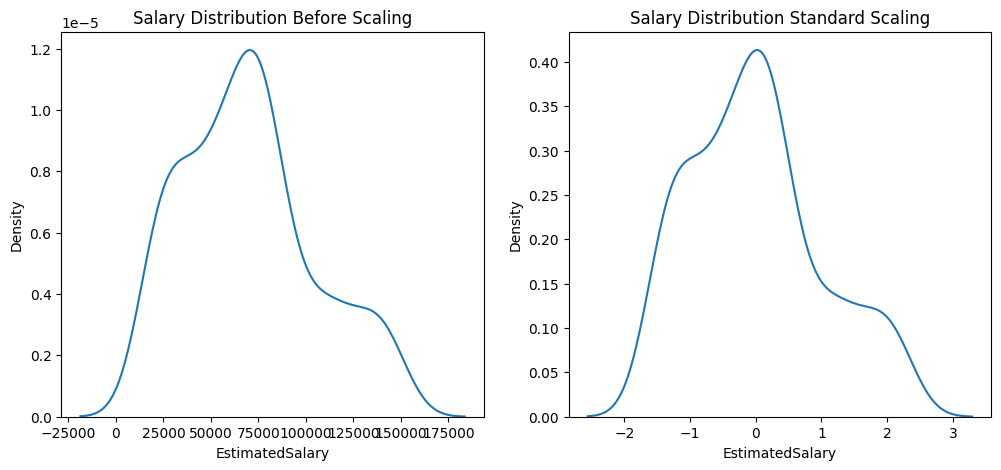

In [92]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## Importance Of Scaling 

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
lr = LogisticRegression()
lr_sc = LogisticRegression()

In [95]:
lr.fit(x_train, y_train)
lr_sc.fit(x_train_scaled, y_train)

LogisticRegression()

In [96]:
y_pred = lr.predict(x_test)
y_pred_sc = lr_sc.predict(x_test_scaled)

In [97]:
from sklearn.metrics import accuracy_score 

In [98]:
print("Accuracy without scaling: ", accuracy_score(y_test, y_pred))
print("Accuracy with scaling: ", accuracy_score(y_test, y_pred_sc))

Accuracy without scaling:  0.875
Accuracy with scaling:  0.8666666666666667


In [99]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_sc = DecisionTreeClassifier()

In [100]:
dt.fit(x_train, y_train)
dt_sc.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [101]:
y_pred = dt.predict(x_test)
y_pred_sc = dt_sc.predict(x_test_scaled)

In [102]:
print("Accuracy without scaling: ", accuracy_score(y_test, y_pred))
print("Accuracy with scaling: ", accuracy_score(y_test, y_pred_sc))

Accuracy without scaling:  0.875
Accuracy with scaling:  0.8666666666666667


## Effect of Oulier

In [110]:
import pandas as pd

# Tumhara existing DataFrame df (maan lete hain already loaded hai)
# df.shape -> (400, 3)

# Ye outlier rows jo tum add karna chah rahe ho
outliers = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})

# Concatenate original df + outliers
df = pd.concat([df, outliers], ignore_index=True)

# Check shape after adding
print(df.shape)


(403, 3)


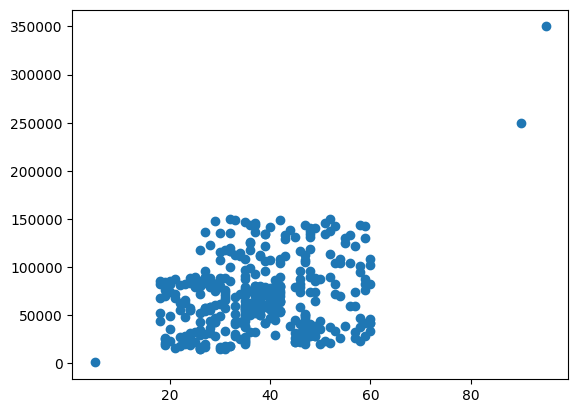

In [111]:
plt.scatter(df['Age'], df['EstimatedSalary'])


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

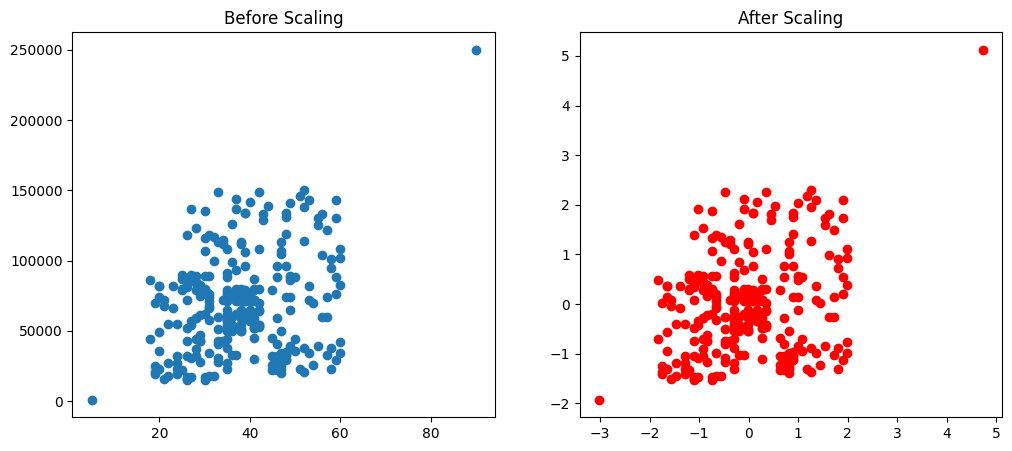

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

# outliear ka effect abhi bhi hai 